# Project Title :- Banking Fraud detection using Machine Learning

# Data Assessment

#### Group - 1

- Harmeet Patel
- Prateek Dahiya
- Parth Patel
- Jugraj Singh
- Gurudatt Singh

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading a dataset
data = pd.read_csv("bs140513_032310.csv")

In [3]:
# Displaying first 5 rows of dataset
data.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [4]:
# Displaying last 5 rows of a dataset
data.tail()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0
594642,179,'C616528518','4','F','28007','M1823072687','28007','es_transportation',26.93,0


### Metadata

- **Step**: This feature represents the day from the start of simulation. It has 180 steps so simulation ran for virtually 6 months.
- **Customer**: This feature represents the customer id
- **zipCodeOrigin**: The zip code of origin/source.
- **Merchant**: The merchant's id
- **zipMerchant**: The merchant's zip code
- **Age**: Categorized age  
0: <= 18,  
1: 19-25,  
2: 26-35,  
3: 36-45,  
4: 46:55,  
5: 56:65,  
6: > 65  
U: Unknown  
- **Gender**: Gender for customer  
E : Enterprise,  
F: Female,  
M: Male,  
U: Unknown  
- **Category**: Category of the purchase. I won't write all categories here, we'll see them later in the analysis.
- **Amount**: Amount of the purchase
- **Fraud**: Target variable which shows if the transaction fraudulent(1) or benign(0)

In [5]:
# Viewing name of all columns in the dataset.
data.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


Above output shows the data type and non-null count of each column in the dataset.

In [7]:
data.shape[:]

(594643, 10)

This tells us that there are 594643 rows and 10 columns in the dataset.

In [8]:
data.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

This tells us the count of null values in each column. As we can see from above output, dataset has no null values.

In [9]:
data.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


From output we can see the general statistics of the features having int or float as their datatype.

In [10]:
duplicates = data[data.duplicated(keep='first')]

In [11]:
duplicates

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud


From the above output, it is noted that there is no duplicates rows present in a dataset.

In [12]:
data['fraud'].unique()

array([0, 1], dtype=int64)

This shows that the target variable has only binary dimensions where 0 stands for no fraud and 1 stands for fraud.

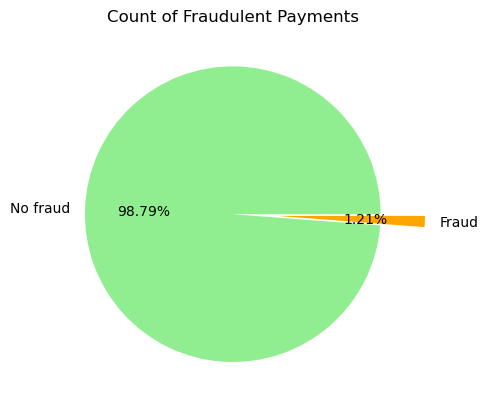

Number of normal transactions:  587443
Number of fraud transactions:  7200


In [13]:
a = data.fraud.value_counts()
plt.pie(a , autopct='%.2f%%', colors=['lightgreen', 'orange'], labels = ['No fraud','Fraud'], explode = (0, 0.3))
plt.title("Count of Fraudulent Payments")
plt.show()

df_fraud = data.loc[data.fraud == 1] 
df_non_fraud = data.loc[data.fraud == 0]
print("Number of normal transactions: ",df_non_fraud.fraud.count())
print("Number of fraud transactions: ",df_fraud.fraud.count())

In [14]:
print(data.gender.value_counts())

'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: gender, dtype: int64


This shows the count of gender type in our dataset.

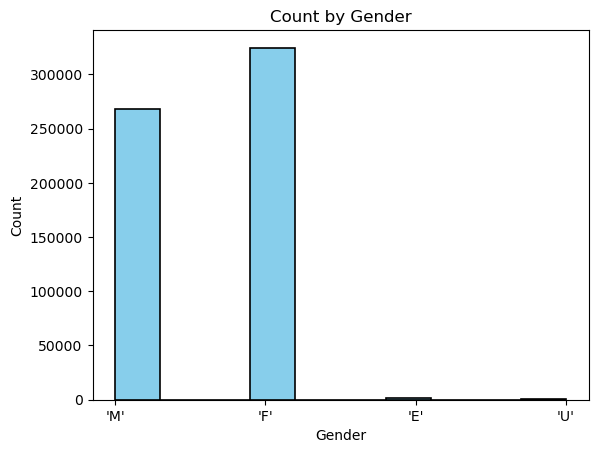

In [15]:
plt.hist(data['gender'],histtype ='barstacked',color='skyblue',edgecolor='black',linewidth=1.2)
plt.title('Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Visualizing gender by count.

In [16]:
data['age'].unique()

array(["'4'", "'2'", "'3'", "'5'", "'1'", "'6'", "'U'", "'0'"],
      dtype=object)

Indentifying unique age group categories.

Text(0, 0.5, 'count')

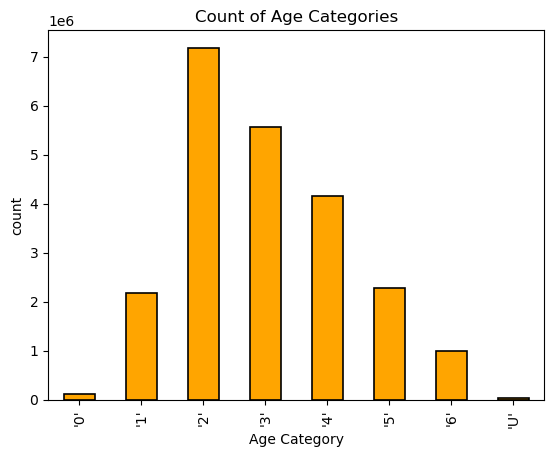

In [17]:
var = data.groupby('age').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar',color='orange',edgecolor='black',linewidth=1.2)
ax1.set_title("Count of Age Categories")
ax1.set_xlabel('Age Category')
ax1.set_ylabel('count')

In [18]:
print(data.category.value_counts())

'es_transportation'        505119
'es_food'                   26254
'es_health'                 16133
'es_wellnessandbeauty'      15086
'es_fashion'                 6454
'es_barsandrestaurants'      6373
'es_hyper'                   6098
'es_sportsandtoys'           4002
'es_tech'                    2370
'es_home'                    1986
'es_hotelservices'           1744
'es_otherservices'            912
'es_contents'                 885
'es_travel'                   728
'es_leisure'                  499
Name: category, dtype: int64


Above output shows value count of tansaction categories. Most number of transactions occured in transportation category, while the leisure category has the least number of transactions.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


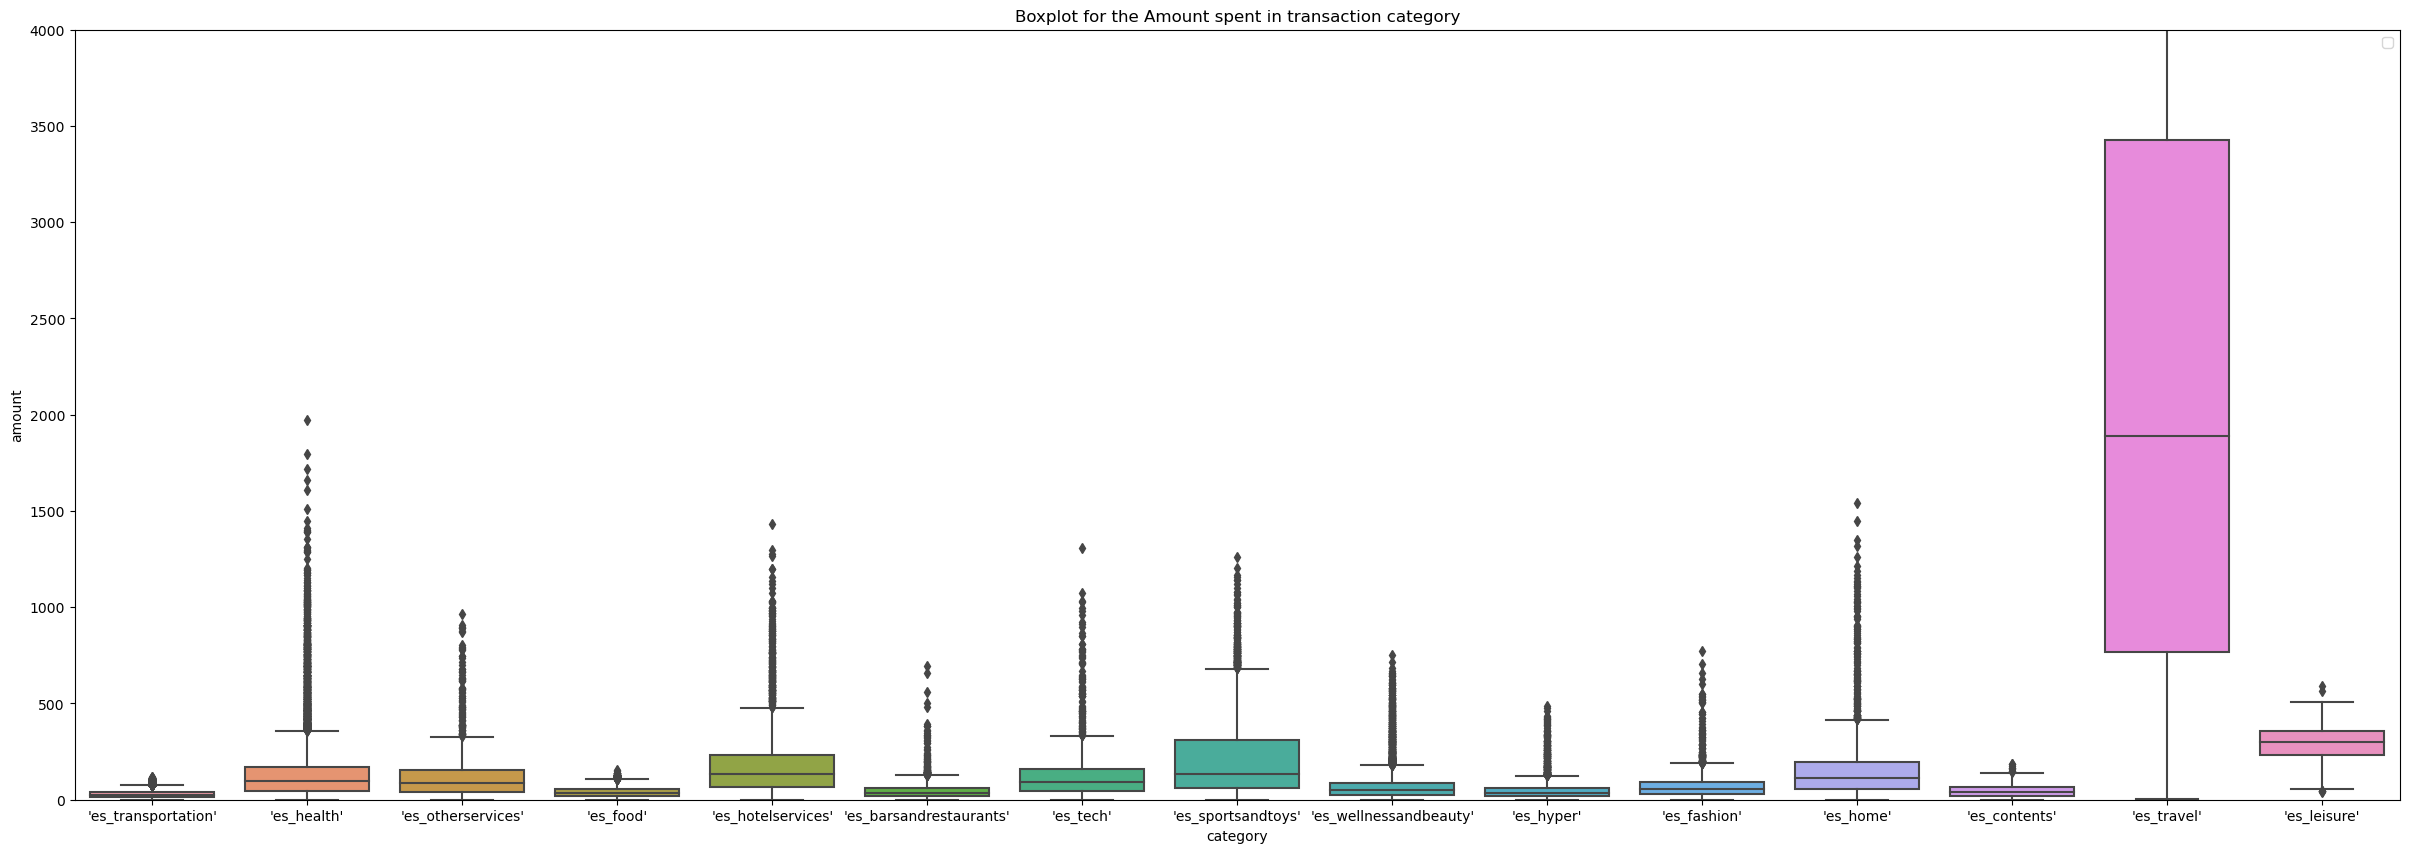

In [19]:
plt.figure(figsize=(30,10))
sns.boxplot(x=data.category,y=data.amount)
plt.title("Boxplot for the Amount spent in transaction category")
plt.ylim(0,4000)
plt.legend()
plt.show()

Above boxplot shows most of transactions occur for travel related expenses. Also, the range of the amount of transactions is the highest in this category. 

# Data Science Ethics Checklist

[![Deon badge](https://img.shields.io/badge/ethics%20checklist-deon-brightgreen.svg?style=popout-square)](http://deon.drivendata.org/)

#### Please refer to the following key to go through the ethical checklist:
- Y - Yes  
- N - No  
- N\A - Not applicable  
- P - Pending  


## A. Data Collection
 - [N\A] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?
 - [N\A] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
 - [Y] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?
 - [N\A] **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

## B. Data Storage
 - [N\A] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
 - [N\A] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?
 - [Y] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?

## C. Analysis
 - [Y] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?
 - [Y] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?
 - [Y] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?
 - [N\A] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?
 - [Y] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?

## D. Modeling
 - [P] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?
 - [P] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?
 - [P] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?
 - [P] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?
 - [P] **D.5 Communicate bias**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?

## E. Deployment
 - [P] **E.1 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?
 - [P] **E.2 Roll back**: Is there a way to turn off or roll back the model in production if necessary?
 - [P] **E.3 Concept drift**: Do we test and monitor for concept drift to ensure the model remains fair over time?
 - [P] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?

*Data Science Ethics Checklist generated with [deon](http://deon.drivendata.org).*
